# Black Friday Analysis

## Dataset Information
This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 550,069 rows and 12 columns.
The dataset can be access in: https://www.kaggle.com/datasets/sdolezel/black-friday

Problem: Predict purchase amount

## Import Modules

In [1]:
!pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\miase\AppData\Local\Temp\ipykernel_10864\3618565165.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Loading the dataset

In [2]:
#loading the dataset
df_train=pd.read_csv('train_blackFriday.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
#loading the dataset
df_test=pd.read_csv('test_blackFriday.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# datatype info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


There missing value and difference dtype

In [5]:
# statistical info
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
# find unique values
df_train.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

## EDA (Exploratory Data Analysis)

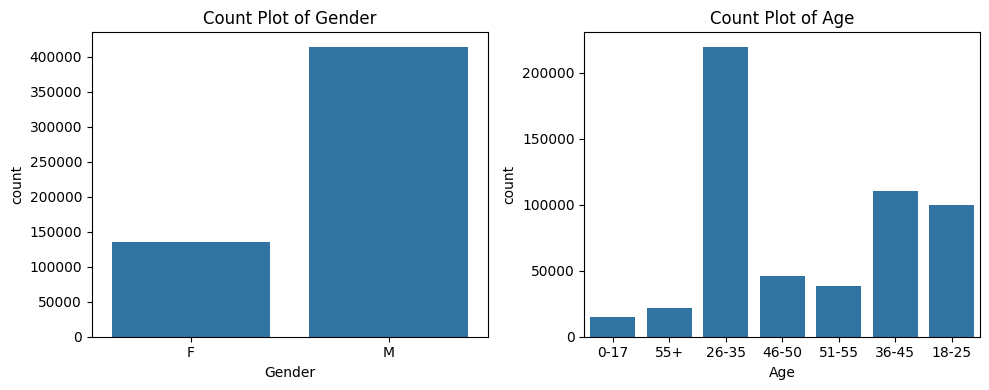

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Count plot for 'Gender'
sns.countplot(x='Gender', data=df_train, ax=axes[0])
axes[0].set_title('Count Plot of Gender')

# Count plot for 'Age'
sns.countplot(x='Age', data=df_train, ax=axes[1])
axes[1].set_title('Count Plot of Age')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

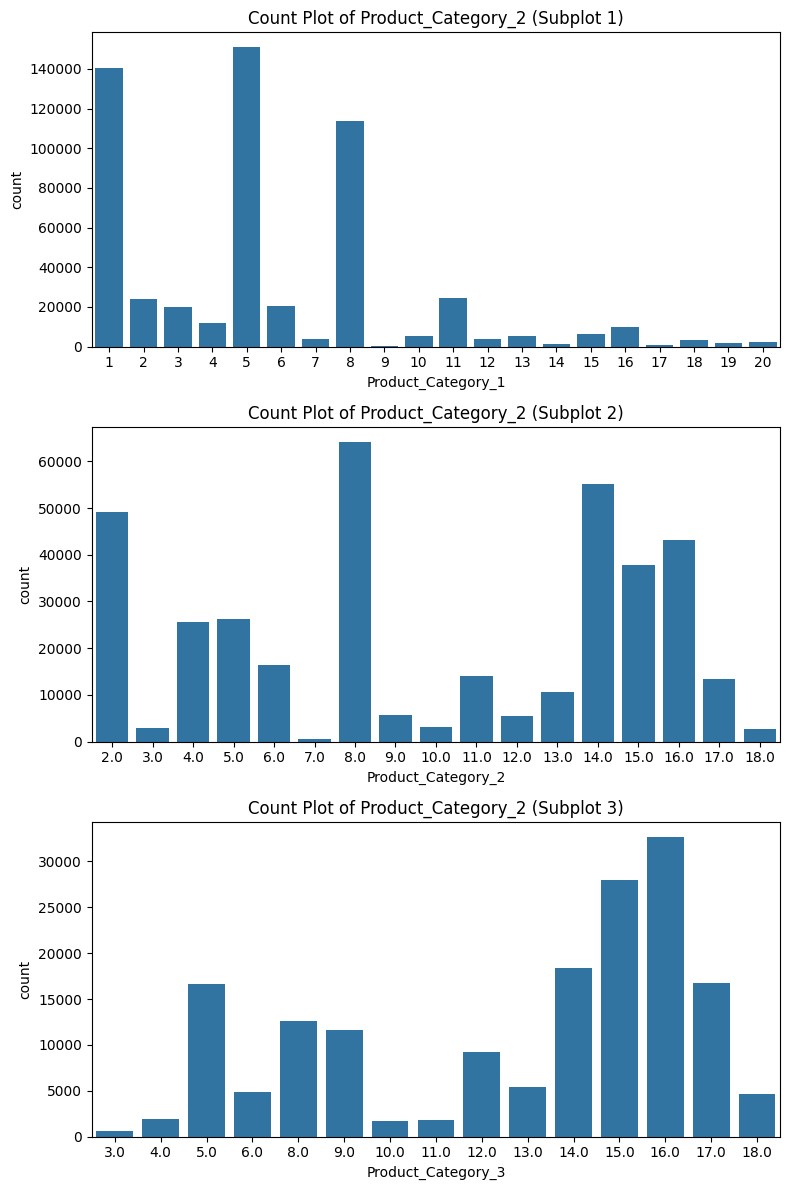

In [8]:

# Set up subplot grid
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# Count plot for 'Product_Category_2' in the first subplot
sns.countplot(x='Product_Category_1', data=df_train, ax=axes[0])
axes[0].set_title('Count Plot of Product_Category_2 (Subplot 1)')

# Count plot for 'Product_Category_2' in the second subplot
sns.countplot(x='Product_Category_2', data=df_train, ax=axes[1])
axes[1].set_title('Count Plot of Product_Category_2 (Subplot 2)')

# Count plot for 'Product_Category_2' in the third subplot
sns.countplot(x='Product_Category_3', data=df_train, ax=axes[2])
axes[2].set_title('Count Plot of Product_Category_2 (Subplot 3)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

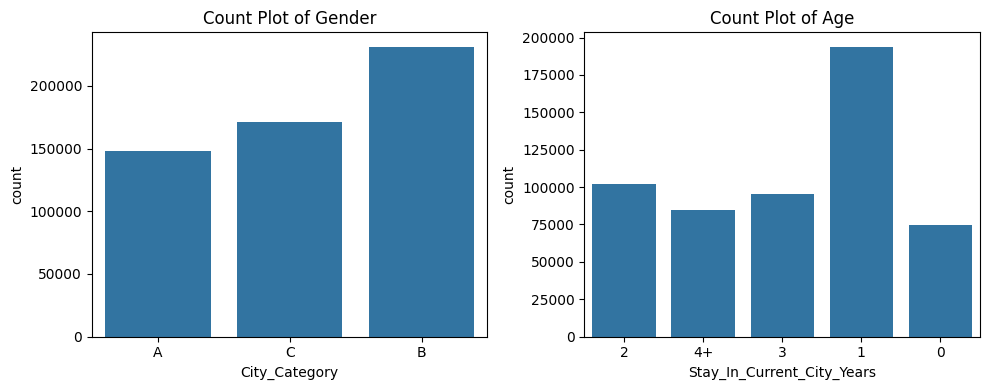

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Count plot for 'Gender'
sns.countplot(x='City_Category', data=df_train, ax=axes[0])
axes[0].set_title('Count Plot of Gender')

# Count plot for 'Age'
sns.countplot(x='Stay_In_Current_City_Years', data=df_train, ax=axes[1])
axes[1].set_title('Count Plot of Age')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Preprocessing the dataset
1. Fix missing value
2. Fix Stay_In_Current_City_Years ("+")
3. Encoding values using dict
4. Use one hot encoding

In [10]:
# Check missing value
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [11]:
# Fix the missing value in Product Category 2 and 3, fillna with mode
df_train['Product_Category_2']=df_train['Product_Category_2'].fillna(df_train['Product_Category_2'].mode()[0])
df_train['Product_Category_3']=df_train['Product_Category_3'].fillna(df_train['Product_Category_3'].mode()[0])

In [12]:
df_train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [13]:
# Encoding values using dict
# gender_dict = {'F':0, 'M':1}
# df_train['Gender'] = df_train['Gender'].apply(lambda x: gender_dict[x])
# df_train.head()

# or can use map
df_train['Gender']=df_train['Gender'].map({'F':0,'M':1})
df_train.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,8.0,16.0,7969


In [14]:
# Fix Stay_In_Current_City_Years ("+")
df_train['Stay_In_Current_City_Years']=df_train['Stay_In_Current_City_Years'].str.replace('+','')
df_train['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [15]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from sklearn.preprocessing import LabelEncoder
cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']

# Create a dictionary to store the mapping
label_mapping = {}

# Apply label encoding and store the mapping
for col in cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    label_mapping[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Display the transformation mapping
for col, mapping in label_mapping.items():
    print(f"{col} Label Mapping: {mapping}")

Age Label Mapping: {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}
City_Category Label Mapping: {'A': 0, 'B': 1, 'C': 2}
Stay_In_Current_City_Years Label Mapping: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4}


In [17]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,8.0,16.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,8.0,16.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,16.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,8.0,16.0,7969


In [18]:
df_train['Product_Category_1'] = df_train['Product_Category_1'].astype(float)

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int32  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int32  
 6   Stay_In_Current_City_Years  550068 non-null  int32  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  float64
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 44.1+ MB


## Modeling

In [20]:
# Define the X and Y
X = df_train.drop(columns=['User_ID', 'Product_ID', 'Purchase'], axis=1)
y = df_train['Purchase']

In [21]:
# Splitting the Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### RandomForestRegressor

In [23]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor(random_state=0)
rfmodel.fit(x_train, y_train)
rfpred = rfmodel.predict(x_test)

In [24]:
mae = mean_absolute_error(y_test,rfpred)
mse = mean_squared_error(y_test, rfpred)
r2 = r2_score(y_test, rfpred)
print(f"RandomForestRegressor \n mae {mae} \n mse {mse}\n r2 {r2}" )

RandomForestRegressor 
 mae 2221.515121125981 
 mse 9324028.037413057
 r2 0.6293230274765236


In [25]:
print("MSE RandomForestRegressor:", np.sqrt(mean_squared_error(y_test, rfpred)))

MSE RandomForestRegressor: 3053.5271469913373


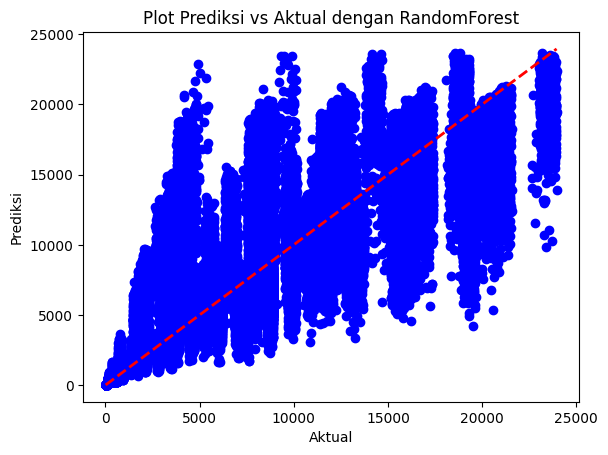

In [64]:
# Buat plot prediksi versus data aktual
plt.scatter(y_test, rfpred, color='blue', label='Aktual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Prediksi')
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.title("Plot Prediksi vs Aktual dengan RandomForest")
plt.show()

### DecisionTreeRegressor

In [26]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [27]:
mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(f"DecisionTreeRegressor \n mae {mae} \n mse {mse}\n r2 {r2}" )

DecisionTreeRegressor 
 mae 2352.2893869336626 
 mse 11055458.576956738
 r2 0.5604899622007131


In [28]:
print("MSE DecisionTreeRegressor:", np.sqrt(mean_squared_error(y_test, pred)))

MSE DecisionTreeRegressor: 3324.974973884275


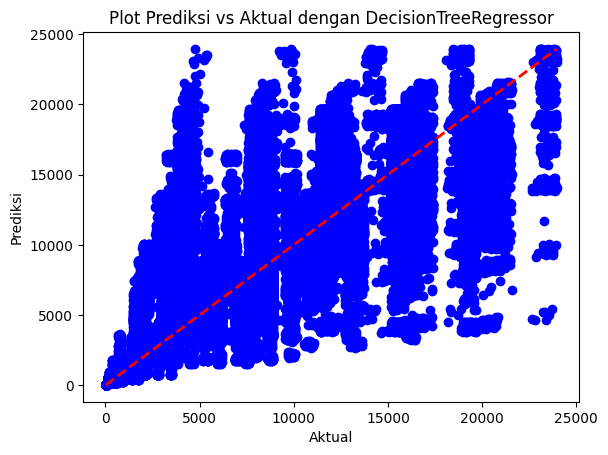

In [69]:
# Buat plot prediksi versus data aktual
plt.scatter(y_test, pred, color='blue', label='Aktual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Prediksi')
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.title("Plot Prediksi vs Aktual dengan DecisionTreeRegressor")
plt.show()

### XGBoost Regressor

In [29]:
# XGBoost Regressor
!pip install xgboost
from xgboost.sklearn import XGBRegressor
xbgmodel = XGBRegressor(learning_rate=0.05, max_depth=6, min_child_weight=40, seed=0)
xbgmodel.fit(x_train, y_train)
xgbpred = xbgmodel.predict(x_test)


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
mae = mean_absolute_error(y_test,xgbpred)
mse = mean_squared_error(y_test, xgbpred)
r2 = r2_score(y_test, xgbpred)
print(f"XGBRegressor \n mae {mae} \n mse {mse}\n r2 {r2}" )

XGBRegressor 
 mae 2225.1287126148827 
 mse 8720274.17163236
 r2 0.653325277814997


In [31]:
print("MSE XGBRegressor:", np.sqrt(mean_squared_error(y_test, xgbpred)))

MSE XGBRegressor: 2953.0110347969176


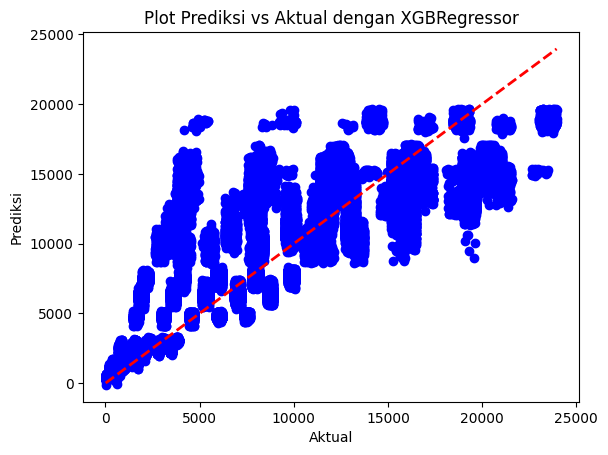

In [70]:
# Buat plot prediksi versus data aktual
plt.scatter(y_test, xgbpred, color='blue', label='Aktual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Prediksi')
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.title("Plot Prediksi vs Aktual dengan XGBRegressor")
plt.show()

### LinearRegression

In [32]:
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)
lrpred = lrmodel.predict(x_test)

In [33]:
mae = mean_absolute_error(y_test,lrpred)
mse = mean_squared_error(y_test, lrpred)
r2 = r2_score(y_test, lrpred)
print(f"LinearRegression \n mae {mae} \n mse {mse}\n r2 {r2}" )

LinearRegression 
 mae 3576.769949299881 
 mse 21889406.812229905
 r2 0.12978607368673933


In [34]:
print("MSE LinearRegression:", np.sqrt(mean_squared_error(y_test, lrpred)))

MSE LinearRegression: 4678.611632977235


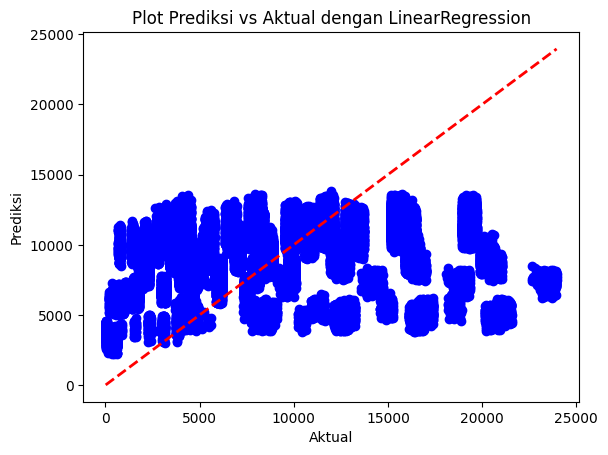

In [71]:
# Buat plot prediksi versus data aktual
plt.scatter(y_test, lrpred, color='blue', label='Aktual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Prediksi')
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.title("Plot Prediksi vs Aktual dengan LinearRegression")
plt.show()

## Conclusion

In [35]:
print("MSE DecisionTreeRegressor:", np.sqrt(mean_squared_error(y_test, pred)))
print("MSE XGBRegressor:", np.sqrt(mean_squared_error(y_test, xgbpred)))
print("MSE RandomForestRegressor:", np.sqrt(mean_squared_error(y_test, rfpred)))
print("MSE LinearRegression:", np.sqrt(mean_squared_error(y_test, lrpred)))

MSE DecisionTreeRegressor: 3324.974973884275
MSE XGBRegressor: 2953.0110347969176
MSE RandomForestRegressor: 3053.5271469913373
MSE LinearRegression: 4678.611632977235
